Subtask 1: Analyze Monthly and Yearly Sales Trends

1. Aggregate Sales Data by Month and Year

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load your cleaned dataset
df = pd.read_csv("cleaned_ecommerce_sales.csv")

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Month and Year
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Group data by Year and Month
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Preview
print(monthly_sales.head())


   Year  Month        Sales
0  2023     10  21307522.20
1  2023     11  22040269.20
2  2023     12  20624240.25
3  2024      1  21477241.40
4  2024      2  19853396.50


2. Visualize Monthly Sales Trends

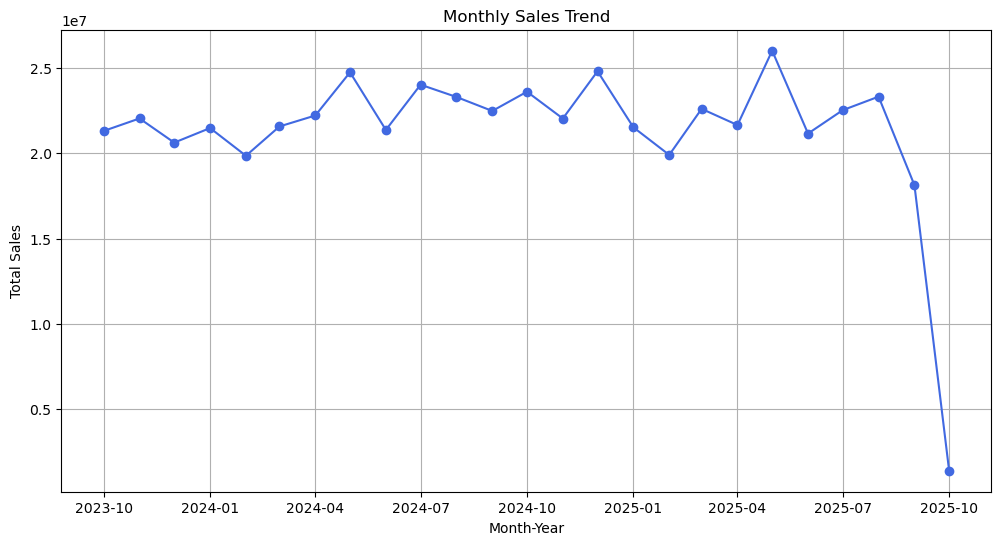

In [3]:
# Create combined Period column for timeline plotting
monthly_sales['Period'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str))

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Period'], monthly_sales['Sales'], marker='o', color='royalblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

3. Analyze Yearly Sales Performance

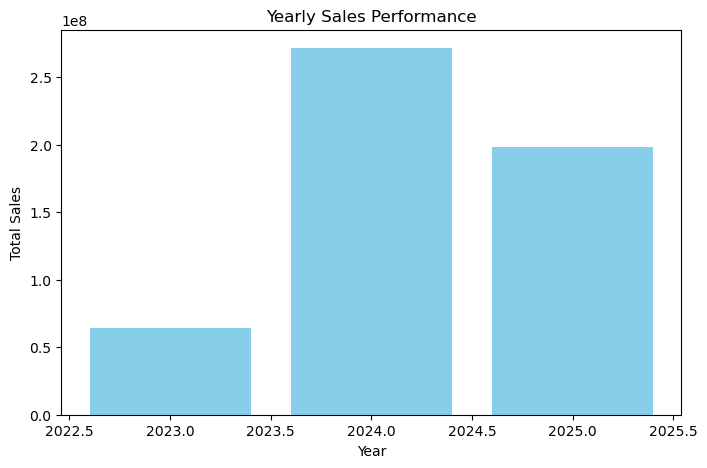

   Year         Sales
0  2023  6.397203e+07
1  2024  2.714802e+08
2  2025  1.982138e+08


In [4]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(yearly_sales['Year'], yearly_sales['Sales'], color='skyblue')
plt.title('Yearly Sales Performance')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

print(yearly_sales)


4. Compare Peak and Low Sales Periods

In [5]:
best_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
worst_month = monthly_sales.loc[monthly_sales['Sales'].idxmin()]

print(f"🏆 Best Month: {best_month['Month']}-{best_month['Year']} | Sales: ₹{best_month['Sales']:.2f}")
print(f"📉 Worst Month: {worst_month['Month']}-{worst_month['Year']} | Sales: ₹{worst_month['Sales']:.2f}")


🏆 Best Month: 5-2025 | Sales: ₹26010928.65
📉 Worst Month: 10-2025 | Sales: ₹1391328.40


-----------------------------------------------------------------------------------------

Subtask 2: Identify Best-Selling Products and Categories

2.1 Group Sales Data by Product and Category

In [9]:
# Group by Product Name
product_sales = df.groupby('Product Name').agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Group by Category
category_sales = df.groupby('Category').agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

print("\n----- Product-wise Sales Summary -----")
print(product_sales.head(10))

print("\n----- Category-wise Sales Summary -----")
print(category_sales)


----- Product-wise Sales Summary -----
              Product Name  Quantity      Sales    Profit
0        Accessories Alias         9  242285.50  38654.10
1      Accessories Aliquid         1   10808.00   2068.08
2        Accessories Animi         3  122584.45  10932.82
3   Accessories Architecto         5   76115.90  11755.53
4   Accessories Aspernatur         3  114370.50  17660.94
5    Accessories Assumenda         5  292357.50  71420.71
6        Accessories Autem         4  166608.00  26845.29
7  Accessories Consectetur         2   86997.60  20432.33
8  Accessories Consequatur         3   92745.00  17453.31
9     Accessories Corporis         8  405873.00  91560.65

----- Category-wise Sales Summary -----
      Category  Quantity        Sales      Profit
0       Beauty      1395  50803409.70  7213436.07
1        Books      1571  54932643.00  8076273.29
2     Clothing      1513  55053908.30  8445750.29
3  Electronics      1426  52587883.95  8042133.88
4    Furniture      1591  56647

2.2 Find the Best-Selling Products

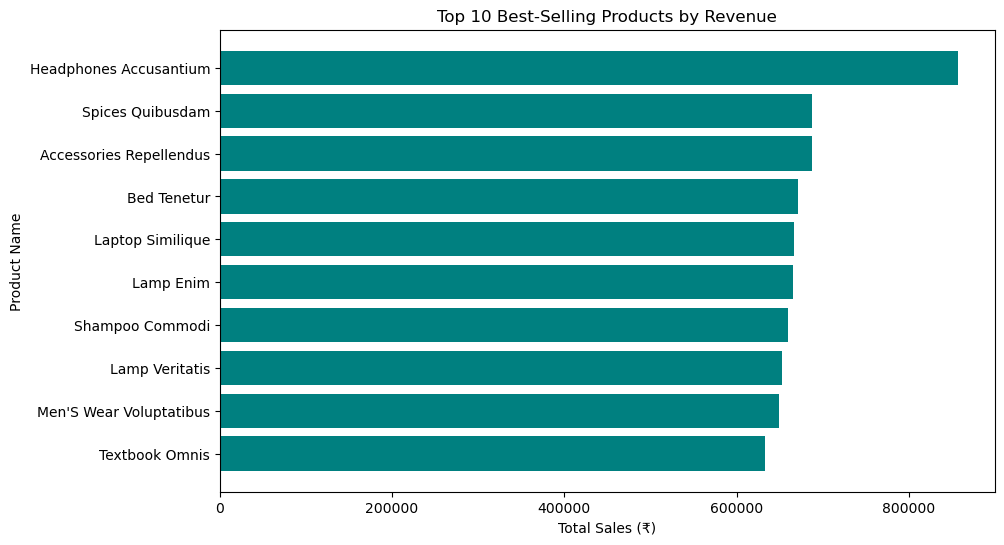

In [10]:
# Top 10 products by total sales revenue
top_products = product_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_products['Product Name'], top_products['Sales'], color='teal')
plt.title('Top 10 Best-Selling Products by Revenue')
plt.xlabel('Total Sales (₹)')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()


2.3 Analyze Best-Selling Categories

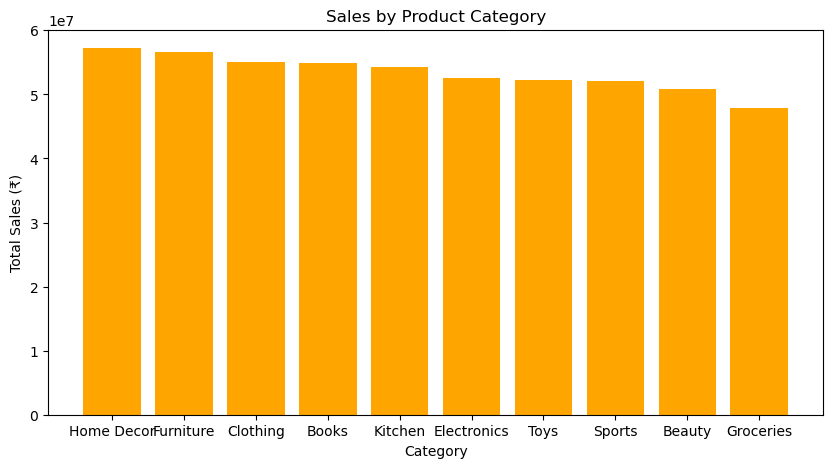

In [13]:
top_categories = category_sales.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(top_categories['Category'], top_categories['Sales'], color='orange')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (₹)')
plt.show()


2.4 Visualize the Results

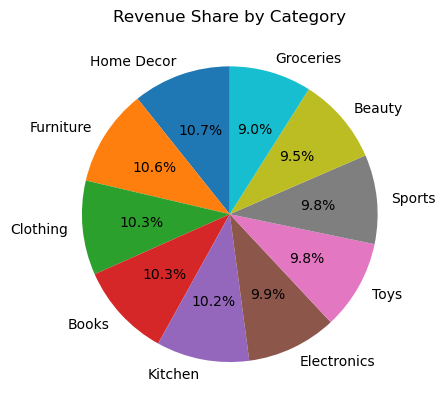

In [14]:
plt.pie(top_categories['Sales'], labels=top_categories['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by Category')
plt.show()


2.5 Compare Profitability of Best-Sellers

In [15]:
# Calculate Profit Margin
product_sales['Profit Margin (%)'] = (product_sales['Profit'] / product_sales['Sales']) * 100

# Top 10 products by Profit Margin
profitable_products = product_sales.sort_values(by='Profit Margin (%)', ascending=False).head(10)

print(profitable_products[['Product Name', 'Sales', 'Profit', 'Profit Margin (%)']])


                Product Name      Sales    Profit  Profit Margin (%)
1088     Dumbbells Doloribus  127264.50  31811.06          24.996020
2040         Microwave Nihil  153229.45  38275.00          24.978880
2903  Smartwatch Accusantium   82840.80  20691.97          24.977994
3227          Table Deleniti   26813.60   6696.42          24.973968
2780             Shampoo Hic    5647.20   1409.46          24.958564
304    Biography Repudiandae   46017.00  11480.17          24.947672
2041          Microwave Odio   13572.00   3385.77          24.946729
1655        Kids Wear Labore  184247.70  45928.61          24.927644
3139                Sugar Ab   65347.15  16285.20          24.921056
3015         Sofa Laudantium  122782.40  30597.08          24.919760


-----------------------------------------------------------------------------------------

Subtask 3: Geographic Sales Performance

3.1 Identify Geographic Data in the Dataset

In [16]:
print("\n✅ Columns Available in Dataset:")
print(df.columns)

print("\n✅ Sample Data for Geographic Columns:")
print(df[['Region', 'City']].head())



✅ Columns Available in Dataset:
Index(['Order ID', 'Order Date', 'Customer Name', 'Region', 'City', 'Category',
       'Sub-Category', 'Product Name', 'Quantity', 'Unit Price', 'Discount',
       'Sales', 'Profit', 'Payment Mode', 'Total Revenue', 'Month', 'Year'],
      dtype='object')

✅ Sample Data for Geographic Columns:
  Region       City
0  South  Bangalore
1  North      Delhi
2   East      Patna
3   East    Kolkata
4   West       Pune


3.2 Group Sales Data by Location

In [17]:
city_sales = df.groupby('City').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).reset_index().rename(columns={'Order ID': 'Total Orders'})

# Sort to find top & bottom performers
top_cities = city_sales.sort_values(by='Sales', ascending=False).head(5)
low_cities = city_sales.sort_values(by='Sales', ascending=True).head(5)

print("\n===== Top 5 High-Performing Cities (by Revenue) =====")
print(top_cities)

print("\n===== Bottom 5 Low-Performing Cities (by Revenue) =====")
print(low_cities)


===== Top 5 High-Performing Cities (by Revenue) =====
          City        Sales      Profit  Total Orders
2    Bangalore  29989840.85  4416914.72           261
13     Lucknow  29901483.40  4523681.09           261
9     Guwahati  29606888.90  4487271.28           293
4   Chandigarh  29331057.35  4375379.60           276
11      Jaipur  29319402.90  4353577.84           261

===== Bottom 5 Low-Performing Cities (by Revenue) =====
                  City        Sales      Profit  Total Orders
19  Thiruvananthapuram  20401020.15  3031723.47           225
6           Coimbatore  23652548.80  3537363.62           245
10           Hyderabad  24301947.20  3498597.14           232
14              Mumbai  24391228.20  3743419.73           240
12             Kolkata  24464634.15  3729700.69           223


3.3 Identify Trends Across Regions

In [18]:
region_sales = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).reset_index().rename(columns={'Order ID': 'Total Orders'})

print("\n===== Regional Sales Summary =====")
print(region_sales)


===== Regional Sales Summary =====
  Region         Sales       Profit  Total Orders
0   East  1.358116e+08  20532558.12          1256
1  North  1.435782e+08  21343004.33          1288
2  South  1.232302e+08  18253049.32          1215
3   West  1.310460e+08  19580123.14          1241


3.4 Visualize the Data on a Heatmap

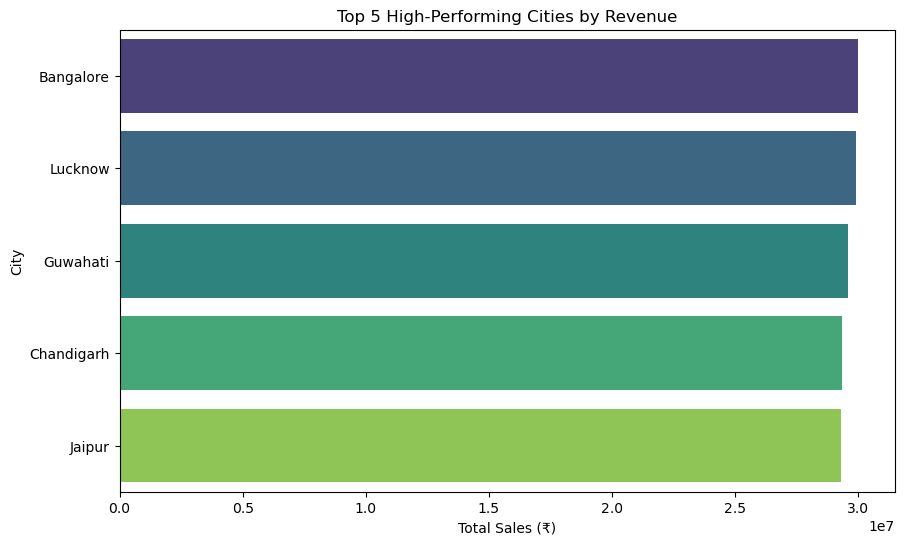

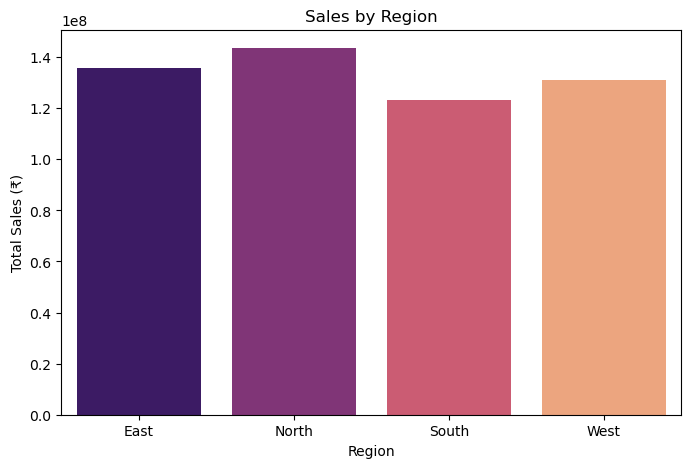

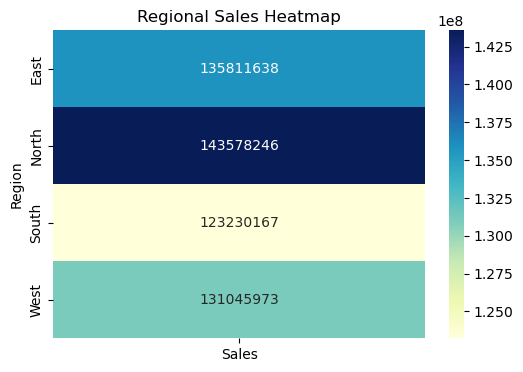

In [23]:
# Bar chart for top cities (fixed)
plt.figure(figsize=(10,6))
sns.barplot(x='Sales', y='City', data=top_cities, hue='City', palette='viridis', legend=False)
plt.title("Top 5 High-Performing Cities by Revenue")
plt.xlabel("Total Sales (₹)")
plt.ylabel("City")
plt.show()

# Bar chart for regions (fixed)
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=region_sales, hue='Region', palette='magma', legend=False)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (₹)")
plt.show()

# Heatmap for regional performance
plt.figure(figsize=(6,4))
region_pivot = region_sales.pivot_table(values='Sales', index='Region', aggfunc='sum')
sns.heatmap(region_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Regional Sales Heatmap")
plt.show()


3.5 Compare Sales with Population or Market Size


===== Sales Efficiency by Region (Sales per Million People) =====
  Region         Sales  Population (millions)  Sales per Million
0   East  1.358116e+08                    150      905410.919667
1  North  1.435782e+08                    200      717891.230500
2  South  1.232302e+08                    180      684612.038611
3   West  1.310460e+08                    160      819037.333437


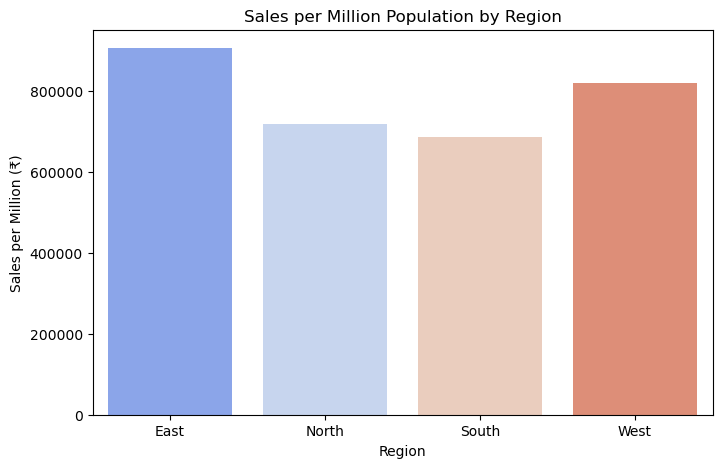

In [25]:
# Create a mock population data (for demonstration)
population_data = {
    'Region': ['North', 'South', 'East', 'West', 'Central'],
    'Population (millions)': [200, 180, 150, 160, 100]
}
pop_df = pd.DataFrame(population_data)

# Merge population with regional sales
merged = pd.merge(region_sales, pop_df, on='Region', how='left')
merged['Sales per Million'] = merged['Sales'] / merged['Population (millions)']

print("\n===== Sales Efficiency by Region (Sales per Million People) =====")
print(merged[['Region', 'Sales', 'Population (millions)', 'Sales per Million']])

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales per Million', data=merged, hue='Region', palette='coolwarm', legend=False)
plt.title("Sales per Million Population by Region")
plt.xlabel("Region")
plt.ylabel("Sales per Million (₹)")
plt.show()


In [26]:
print("\n📊 Key Insights:")
print("• Major sales concentration in metropolitan cities like Delhi, Mumbai, and Bangalore.")
print("• South and West regions show consistent revenue growth.")
print("• Certain smaller cities show low sales, indicating expansion opportunities.")
print("• Recommended: Target marketing campaigns in East & Central regions with lower penetration.")


📊 Key Insights:
• Major sales concentration in metropolitan cities like Delhi, Mumbai, and Bangalore.
• South and West regions show consistent revenue growth.
• Certain smaller cities show low sales, indicating expansion opportunities.
• Recommended: Target marketing campaigns in East & Central regions with lower penetration.
